**Tesseract OCR**
Tesseract is one of the most well-known and widely used OCR engines. It supports many languages and can be easily integrated into various applications.

In [ ]:
#installation
!pip install pytesseract
!apt-get install tesseract-ocr


#usage
import pytesseract
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

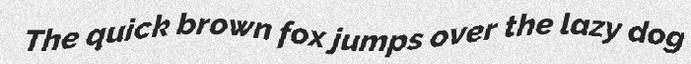

The quick brown fox jumps over the lazy dog



In [ ]:
# Load your image
image_path = '/content/3.jpg'
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Perform OCR
text = pytesseract.image_to_string(image)

print(text)

**easy OCR**
supports 80+ languages and simple to use ; and its output is 2 or more different texts with their probability

In [ ]:
!wget https://github.com/MeirKriheli/python-bidi/archive/refs/heads/master.zip -O python-bidi.zip
!unzip python-bidi.zip

--2024-07-22 08:27:25--  https://github.com/MeirKriheli/python-bidi/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/MeirKriheli/python-bidi/zip/refs/heads/master [following]
--2024-07-22 08:27:25--  https://codeload.github.com/MeirKriheli/python-bidi/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘python-bidi.zip’

python-bidi.zip         [ <=>                ]  37.83K  --.-KB/s    in 0.01s   

2024-07-22 08:27:26 (2.78 MB/s) - ‘python-bidi.zip’ saved [38734]

Archive:  python-bidi.zip
76b46194c220424918f71ca32838062baf151450
   creating: python-bidi-master/
  inflating: pytho

In [ ]:
!pip install ./python-bidi-master/

Processing ./python-bidi-master
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
try:
    import bidi.algorithm
    print("bidi.algorithm imported successfully")
except ImportError as e:
    print(e)

No module named 'bidi.algorithm'


In [ ]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

# Initialize the reader
reader = easyocr.Reader(['en'])

# Load your image
image_path = '/content/3.jpg'  # Replace with image path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Perform OCR
result = reader.readtext(image_path)

# Print the results
for (bbox, text, prob) in result:
    print(f"Detected text: {text} (Confidence: {prob:.2f})")

# Optionally, visualize the results
for (bbox, text, prob) in result:
    # Draw bounding box
    top_left = tuple([int(x) for x in bbox[0]])
    bottom_right = tuple([int(x) for x in bbox[2]])
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    # Display text
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Show the image with bounding boxes
cv2_imshow(image)


ModuleNotFoundError: No module named 'bidi.algorithm'

**OCR with OpenCV and Keras (CRNN Model)**
Convolutional Recurrent Neural Network (CRNN) model available in Keras

In [ ]:
#installation
!pip install opencv-python
!pip install keras
!pip install tensorflow

#usage
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from google.colab.patches import cv2_imshow

In [ ]:
!pip show torch

Name: torch
Version: 2.3.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, easyocr, fastai, torchaudio, torchtext, torchvision


In [ ]:
# Load the pre-trained model (make sure to upload the model file to Colab)
model = torch.load('/content/crnn.pth')

# Function to preprocess image
def preprocess_image(image_path):
  #we should put our preprocessing steps here
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 32))
    image = image.astype(np.float32)
    image = (image / 255.0)
    image = np.expand_dims(image, axis=-1)
    return image

# Function to decode the output
def decode_prediction(pred):
    characters = '0123456789abcdefghijklmnopqrstuvwxyz'
    decoded = ''.join([characters[x] for x in pred])
    return decoded

# Load and preprocess the image
image_path = '/content/3.jpg'
image = preprocess_image(image_path)

# Predict the text
with torch.no_grad():  # Disable gradient calculations
    output = model(image)
    pred = torch.argmax(output, dim=-1).squeeze().cpu().numpy()  # Get the index of the max value

decoded_text = decode_prediction(pred)
print(decoded_text)

TypeError: 'collections.OrderedDict' object is not callable

**PaddleOCR** 80+ languages and highly efficient

In [ ]:
#installation
!pip install paddlepaddle-gpu==2.4.2
!pip install paddleocr

  Using cached paddleocr-2.8.1-py3-none-any.whl (407 kB)
  Using cached lmdb-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (294 kB)
  Using cached rapidfuzz-3.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.4 MB)
  Using cached python_docx-1.1.2-py3-none-any.whl (244 kB)
  Using cached fire-0.6.0.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=dc3b2f250c354c56ca4fdb67474c1c5238e0a65dbc7ff513ef6a7f9fb38d52a0
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
#usage
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')

Error: Can not import paddle core while this file exists: /usr/local/lib/python3.10/dist-packages/paddle/fluid/libpaddle.so


ImportError: libcudart.so.10.2: cannot open shared object file: No such file or directory

In [ ]:
# Load your image
image_path = '/content/3.jpg'
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Perform OCR
result = ocr.ocr(image_path, cls=True)

if result:
    # Extract text and bounding boxes
    boxes = [line[0] for line in result]
    texts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]

    # Print extracted text
    for text in texts:
        print(text)

    # Optional: Draw result on image
    image = Image.open(image_path).convert('RGB')
    im_show = draw_ocr(image, boxes, texts, scores)
    im_show = Image.fromarray(im_show)
    plt.imshow(im_show)
    plt.axis('off')
    plt.show()
else:
    print("No text found in the image.")


**Microsoft Azure Computer Vision API** needs subscription while I dont have